In [11]:
# подгружаем библиотеки

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st
import numpy as np

In [12]:
# подгружаем данные, необходим путь до АБ-датасета!

tsv_data = pd.read_csv('C:/Users/Eva-02/Downloads/Telegram Desktop/dataset/dataset.tsv', 
                       sep='\t', 
                       usecols=[0,1,2,3], 
                       names=['day', 'test_id', 'ind_feat', 'feat'])
tsv_data.head(2), tsv_data.tail(2)

(   day  test_id  ind_feat      feat
 0    3        1         0  4.946383
 1   15        1         0  5.094175,
           day  test_id  ind_feat      feat
 29999998    7        2      1499  0.881856
 29999999    5        2      1499  4.583794)

In [13]:
# меняем название то то, что больше нравится
df = tsv_data

In [14]:
# разбиваем АБ тест на А и Б датафреймы
df1 = df[df.test_id == 1]
df2 = df[df.test_id == 2]

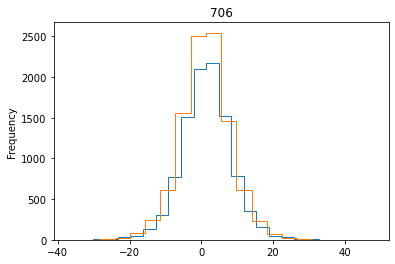

In [15]:
#Итак, давайте потыкаем разные фичи. Можно сразу заметить, что все распределения очень похожи.

#Функция для построения histplot конкретной фичи, пригодится в конце для проверки
def cryPlot(i):
    #i = sda[i][1]
    df1[df1.ind_feat == i].feat.plot(kind='hist', bins=20, histtype='step')
    df2[df2.ind_feat == i].feat.plot(kind='hist', bins=20, histtype='step')
    plt.title(str(i))
    
cryPlot(706)

### Поиск фич с разным распределением с помощью теста Колмогорова-Смирнова

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

In [22]:
%%time
#----------------------------------
diff_arr = [0] * 1500
for i in range(1500):
    diff = st.ks_2samp(df1[df1.ind_feat == i].feat, df2[df2.ind_feat == i].feat)[1]
    diff_arr[i] = (diff, i)

CPU times: total: 1min 59s
Wall time: 39.2 s


In [23]:
sorted_diff_arr = sorted(diff_arr)[:100]
sorted_diff_arr[:10]

[(0.0, 988),
 (0.0, 1401),
 (2.08e-322, 1076),
 (1.2756658316799635e-118, 814),
 (1.3698335696749813e-97, 709),
 (2.4670208918635897e-69, 1423),
 (3.86385438073964e-54, 677),
 (5.697492326986149e-28, 1289),
 (3.614915285051308e-20, 493),
 (6.711508192196644e-19, 940)]

In [25]:
print('Answer:', *sorted([item[1] for item in sorted_diff_arr[:10]]))

Answer: 493 677 709 814 940 988 1076 1289 1401 1423


#### Давайте построим анимацию, с помощью которой убедимся в существовании "плохих" фич

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(rc={"figure.figsize": (10, 7)})

import warnings

warnings.filterwarnings("ignore")

# to display animation in notebook
from IPython.display import HTML
from matplotlib.animation import ArtistAnimation, FuncAnimation

In [27]:
fig, ax = plt.subplots()
ax.set_xlim((-30, 30))
ax.set_ylim((0, 4000))
ax.grid(False)
ims = []

for i in range(100):
    idx = sorted_diff_arr[i][1]
    
    txt = plt.text(
        -0.5, 1.4, "Index_feat = {}".format(idx), bbox=dict(facecolor="white", alpha=1)
    )
    
    *rr, (c1,) = plt.hist(df1[df1.ind_feat == idx].feat, bins=20, histtype='step')
    *rr, (c2,) = plt.hist(df2[df2.ind_feat == idx].feat, bins=20, histtype='step')
    
    #plt.title(str(i))
    #txt = plt.title(str(idx))
    #txt2 = plt.text(str(idx))
    ims.append([c1, c2, txt])

# hide static plot
plt.close()

ani = ArtistAnimation(fig, ims, interval=2000, repeat_delay=1000, blit=False)
ani

In [28]:
# первые 10 фич вполне "плохие"
HTML(ani.to_html5_video())